In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
%matplotlib inline

In [2]:
# Load creation times and persistent data I/O stats (for classification) of queries
df = pd.read_parquet('../dataset_masked_v3.parquet', columns = ['persistentReadBytesCache', 
                                                                'persistentReadBytesS3', 
                                                                'persistentWriteBytesS3',
                                                                'createdTime'],
                    engine='fastparquet')

In [4]:
# Calculate total amount of persistent data bytes read and written
df['persistentReadBytes'] = df['persistentReadBytesCache'] + df['persistentReadBytesS3']
# Cache is write-through
df['persistentWriteBytes'] = df['persistentWriteBytesS3']

In [7]:
# Assign query classes
df['ronly'] = (df['persistentWriteBytes'] == 0).astype('int')
df['wonly'] = (df['persistentReadBytes'] == 0).astype('int')
df['rw'] = ((df['persistentReadBytes'] > 0) & (df['persistentWriteBytes'] > 0)).astype('int')

In [9]:
# Plot per-class distribution of queries over time
df.set_index('createdTime', inplace=True)

In [11]:
# Compute query counts per hour
qcounts = df.resample('H').agg({'ronly': 'sum', 'wonly': 'sum', 'rw': 'sum'})

Text(0.5, 1.0, 'Number of query submissions binner per hour')

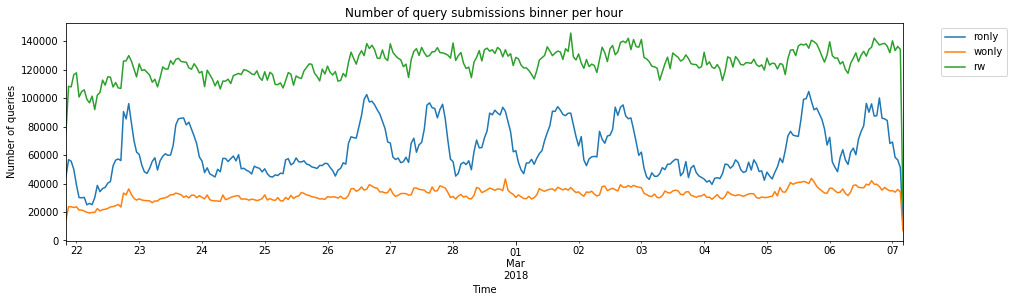

In [17]:
ax = qcounts.plot(figsize=(15,4))
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax.set_xlabel('Time')
ax.set_ylabel('Number of queries')
ax.set_title('Number of query submissions binner per hour')